In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Код алгоритма

In [2]:
# гауссово ядро
def gaussian_kernel(distances, h):
    return np.exp(-1 / 2 * (distances ** 2) / ((h+1e-10) ** 2)) / (2 * np.pi)

def knn(X_train, y_train, X_test, k):
    # вычисление расстояний
    distances = cdist(X_test, X_train)
    
    # нахождение ближайших точек
    nearest = np.argpartition(distances, k, axis=1)[:, :k]

    # расстояния для парзеновского окна
    h = np.take_along_axis(distances, nearest[:, -1:], axis=1)
    dists = np.take_along_axis(distances, nearest, axis=1)
    
    # вычисление весов
    weights = gaussian_kernel(dists, h)
    
    # присвоение меток класса
    y_neighbors = y_train[nearest]
    classes = np.unique(y_train)
    masks = [y_neighbors == c for c in classes]
    weighted_counts = np.array([np.sum(weights * mask, axis=1) for mask in masks])
    predictions = classes[np.argmax(weighted_counts, axis=0)]
    
    return predictions

In [3]:
# Leave-One-Out
def loo(X, y, k):
    y_pred = y.copy()
    for i in range(len(X)):
        y_pred[i] = knn(np.delete(X, i, axis=0), np.delete(y, i), X[i:i+1], k)
    return np.sum(y_pred != y) / len(y)

# Тестирование на данных

In [4]:
data = pd.read_csv('screentime_analysis.csv')
data = data.drop(['Date'], axis=1)
X = data.drop(['App'], axis=1)
y = data['App']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

In [5]:
ks = []
errors = []
for k in range(1, 31):
    ks.append(k)
    errors.append(loo(X.values, y.values, k))

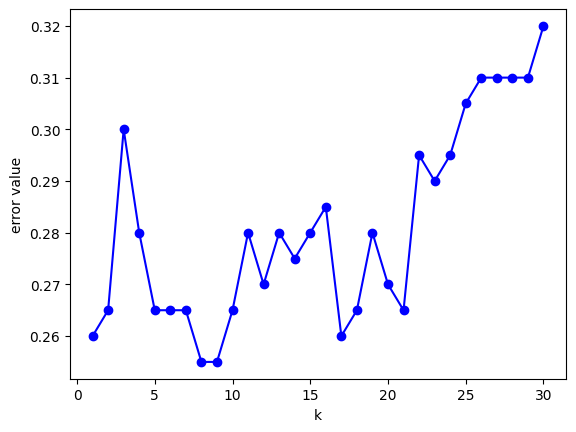

In [6]:
plt.plot(ks, errors, marker='o', linestyle='-', color='b')
plt.xlabel('k')
plt.ylabel('error value')
plt.show()

In [7]:
optimal_k = 9

start_time = datetime.datetime.now()
y_pred = knn(X_train.values, y_train.values, X_test.values, optimal_k)
end_time = datetime.datetime.now()
time_taken = end_time - start_time
print(classification_report(y_test, y_pred))
print(f'Время работы (вручную): {time_taken}')

              precision    recall  f1-score   support

 8 Ball Pool       0.50      0.50      0.50         6
    Facebook       0.57      0.67      0.62         6
   Instagram       0.57      0.67      0.62         6
    LinkedIn       0.60      0.86      0.71         7
     Netflix       0.80      0.67      0.73         6
      Safari       0.83      0.83      0.83         6
    WhatsApp       1.00      0.71      0.83         7
           X       0.75      0.50      0.60         6

    accuracy                           0.68        50
   macro avg       0.70      0.68      0.68        50
weighted avg       0.71      0.68      0.68        50

Время работы (вручную): 0:00:00.001004


In [8]:
start_time = datetime.datetime.now()
knc = KNeighborsClassifier(n_neighbors=optimal_k).fit(X_train, y_train)
y_pred = knc.predict(X_test)
end_time = datetime.datetime.now()
time_taken = end_time - start_time
print(classification_report(y_test, y_pred))
print(f'Время работы (библиотека): {time_taken}')

              precision    recall  f1-score   support

 8 Ball Pool       0.50      0.50      0.50         6
    Facebook       0.44      0.67      0.53         6
   Instagram       0.50      0.50      0.50         6
    LinkedIn       0.60      0.86      0.71         7
     Netflix       0.80      0.67      0.73         6
      Safari       0.83      0.83      0.83         6
    WhatsApp       1.00      0.57      0.73         7
           X       0.75      0.50      0.60         6

    accuracy                           0.64        50
   macro avg       0.68      0.64      0.64        50
weighted avg       0.68      0.64      0.64        50

Время работы (библиотека): 0:00:00.009979


In [9]:
data = pd.read_csv('updated_pollution_dataset.csv')
X = data.drop(['Air Quality'], axis=1)
y = data['Air Quality']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

In [10]:
ks = []
errors = []
for k in range(1, 16):
    ks.append(k)
    errors.append(loo(X.values, y.values, k))

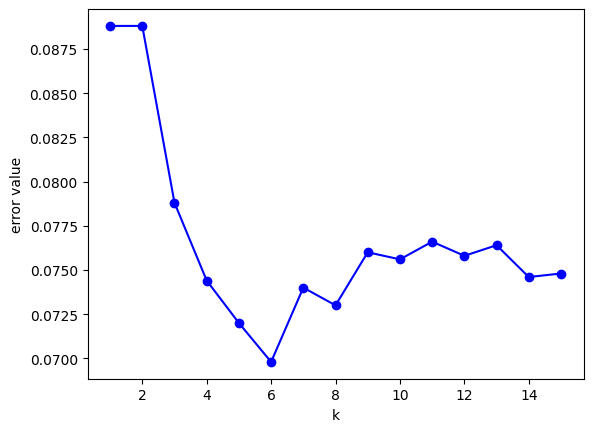

In [11]:
plt.plot(ks, errors, marker='o', linestyle='-', color='b')
plt.xlabel('k')
plt.ylabel('error value')
plt.show()

In [12]:
optimal_k = 6

start_time = datetime.datetime.now()
y_pred = knn(X_train.values, y_train.values, X_test.values, optimal_k)
end_time = datetime.datetime.now()
time_taken = end_time - start_time
print(classification_report(y_test, y_pred))
print(f'Время работы (вручную): {time_taken}')

              precision    recall  f1-score   support

        Good       0.99      1.00      0.99       500
   Hazardous       0.92      0.75      0.83       125
    Moderate       0.93      0.96      0.94       375
        Poor       0.85      0.86      0.85       250

    accuracy                           0.93      1250
   macro avg       0.92      0.89      0.90      1250
weighted avg       0.93      0.93      0.93      1250

Время работы (вручную): 0:00:00.088078


In [13]:
start_time = datetime.datetime.now()
knc = KNeighborsClassifier(n_neighbors=optimal_k).fit(X_train, y_train)
y_pred = knc.predict(X_test)
end_time = datetime.datetime.now()
time_taken = end_time - start_time
print(classification_report(y_test, y_pred))
print(f'Время работы (библиотека): {time_taken}')

              precision    recall  f1-score   support

        Good       0.99      1.00      0.99       500
   Hazardous       0.88      0.80      0.84       125
    Moderate       0.92      0.97      0.94       375
        Poor       0.87      0.82      0.85       250

    accuracy                           0.93      1250
   macro avg       0.91      0.90      0.90      1250
weighted avg       0.93      0.93      0.93      1250

Время работы (библиотека): 0:00:00.133017
